# Matplotlib  


## Matplotlibとは  

グラフを描画するライブラリ  

## 参考  

- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
from IPython.display import HTML
import japanize_matplotlib


---

## グラフを作成  

- `plot()`：データを図表上に示す  
  引数が1つの場合はY軸と判断、X軸は`[0, 1, 2, 3 …]`の値で自動生成  


- `show()`：無くても描画できる  
  【理由】Notebook(Ipython)が、処理終了時点の設定値で描画してくれる(通常は書かないと描画されない)  

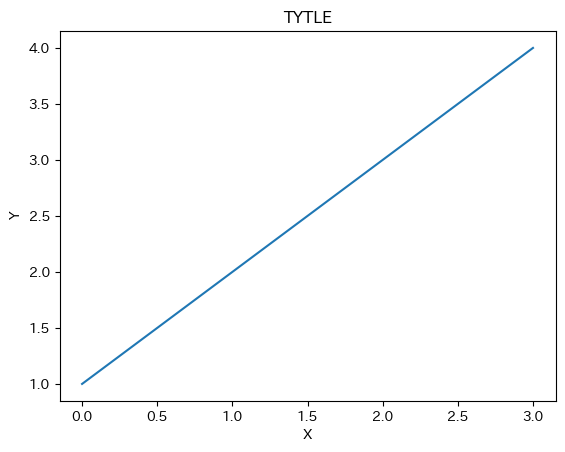

In [2]:
plt.plot([1, 2, 3, 4])
plt.title('TYTLE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- `plot(X軸, Y軸)`  

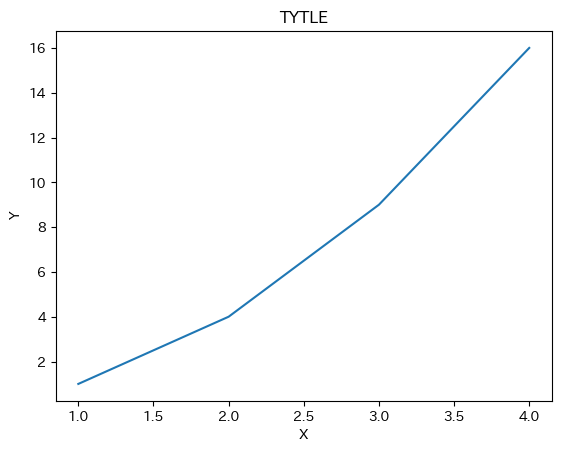

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title('TYTLE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- Yの値を計算  
  - Xの値はNumpyで生成  
  - リスト(`[0,1,2,3,4]`)やタプル(`(0,1,2,3,4)`)はエラー  

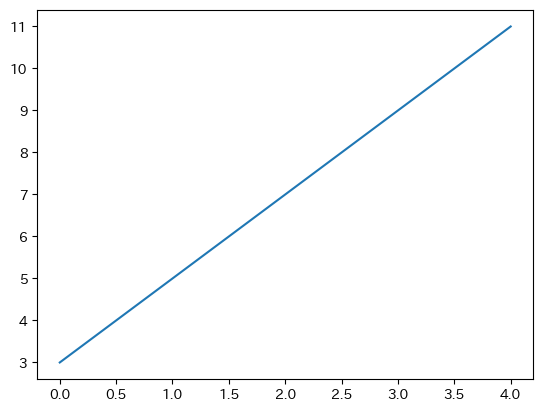

In [4]:
#x = np.array([0,1,2,3,4])
x = np.arange(0,5)
y = 2 * x + 3
plt.plot(x, y)


---

## グラフのフォーマット  

- 線グラフのデフォルト値は`b-`：青色の直線 → `ro`：赤色の点に変更  
- `grid()`：グリッドを表示  

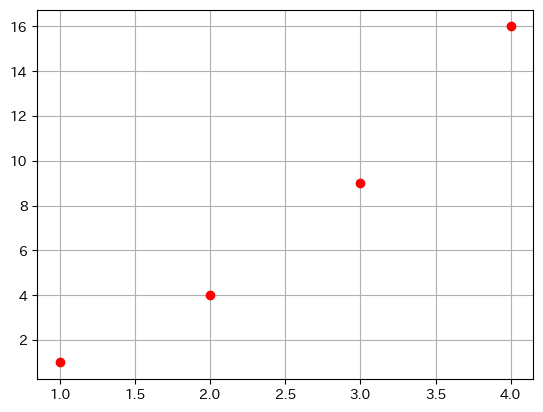

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.grid()

- 太線：`linewidth`を指定  

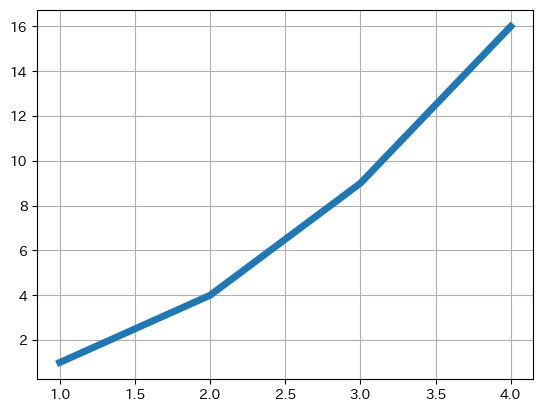

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], linewidth=5.0)
plt.grid()

- 線毎に色を変更  

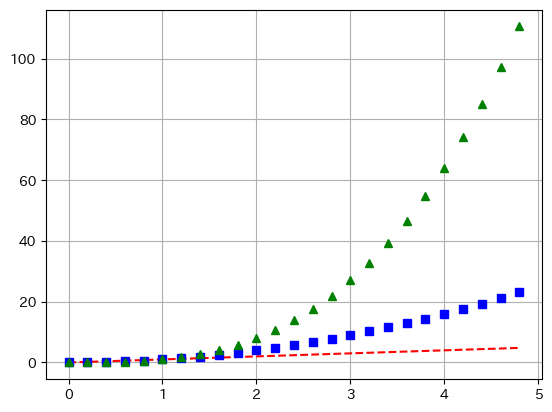

In [7]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

plt.grid()

- X軸・Y軸の開始位置を調整  
  - `axis(X軸開始,X軸終了,Y軸開始,Y軸終了)`  

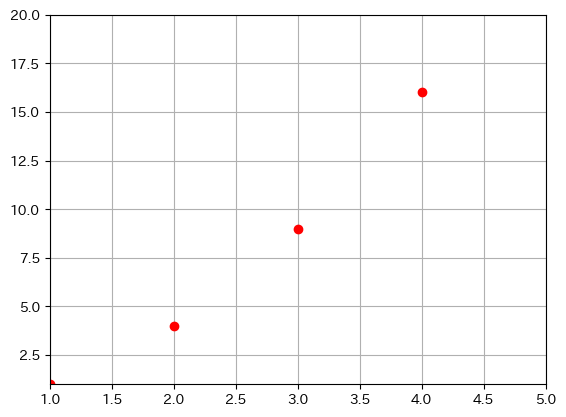

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([1, 5, 1, 20])
plt.grid()


---

## 複数のグラフを作成  

Matplotlib 各機能の関係性  
- axis：軸(X軸、Y軸)  
- axes(英語の単語`axis`の複数形)：描画領域(1つのグラフ)  
- figure：描画領域の全体(図、複数のグラフを格納できる)  

![](./images/Figure.png)  

- figure(figsize=(幅, 高さ))：Figure(図)を作成  
  書かなくても自動生成(今までは、いきなりplot()を実行)  
  → フォーマットを指定する場合、figure()を使用する  

- 幅・高さの単位は「インチ」、dpiのデフォルト値は「100」  
  例）figsize=(9, 3)：9インチ×3インチ  
  → (9 × 100dpi) × (3 × 100dpi) = 900ピクセル × 300ピクセル  

- subplot(LMN)：複数のAxes(グラフ)を作成  
  引数：1桁の整数を3つ組み合わせたもの  
  例）132：1行3列のグラフを作成、うち左から2番目(真ん中の列)が対象  
  - L：行(縦の個数)  
  - M：列(横の個数)  
  - N：左上から右に数えて何番目の場所か → 1行目の列が終わったら2行目へ  

- グラフの種類  
  - bar：棒グラフ  
  - scatter：散布図  
  - plot：ノーマル(線グラフ)  

- suptitle()：図全体のタイトルを設定  


Text(0.5, 0.98, 'Categorical Plotting')

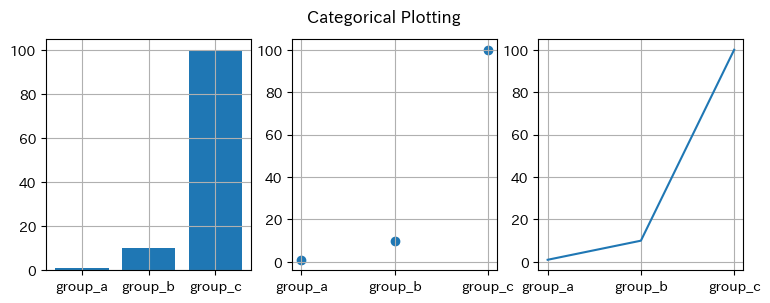

In [9]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.grid()

plt.subplot(132)
plt.scatter(names, values)
plt.grid()

plt.subplot(133)
plt.plot(names, values)
plt.grid()

plt.suptitle('Categorical Plotting')

複数のグラフを効率良く作成 → subplots()を使用  
`Figure(図), Axes(複数のグラフ) = plt.subplots(行数, 列数, squeeze=False, オプション)`  

- 引数`squeeze=False`は設定しておく  
  → 行列数に関係なく、図の位置を二次元配列(axes[0,1])で指定できるようになる  
  例）1行3列のグラフを作成した場合、位置は一次元配列(axes[1])で書かないとエラーになる  

Text(0.5, 0.98, 'Categorical Plotting')

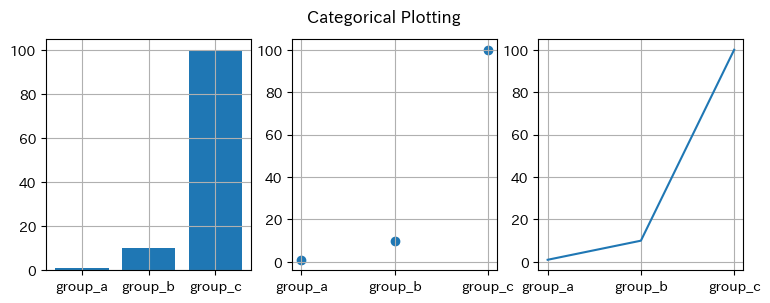

In [10]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

fig, ax = plt.subplots(1, 3, squeeze=False, figsize=(9, 3))

ax[0,0].bar(names, values)
ax[0,0].grid()

ax[0,1].scatter(names, values)
ax[0,1].grid()

ax[0,2].plot(names, values)
ax[0,2].grid()

plt.suptitle('Categorical Plotting')


---
